In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE  


# Import Data

In [2]:
df = pd.read_csv("data/small_fmnist.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,164,177,163,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,40,...,125,93,87,49,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,154,118,66,0,0,0,0,0,0,0


In [7]:
label2cat = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Dataset Splitting

In [3]:
x = df.drop(columns="label")
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 784), (1000, 784), (4000,), (1000,))

# Visualization

In [4]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

/opt/anaconda3/envs/jcop_usl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/jcop_usl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [5]:
import matplotlib.pyplot as plt

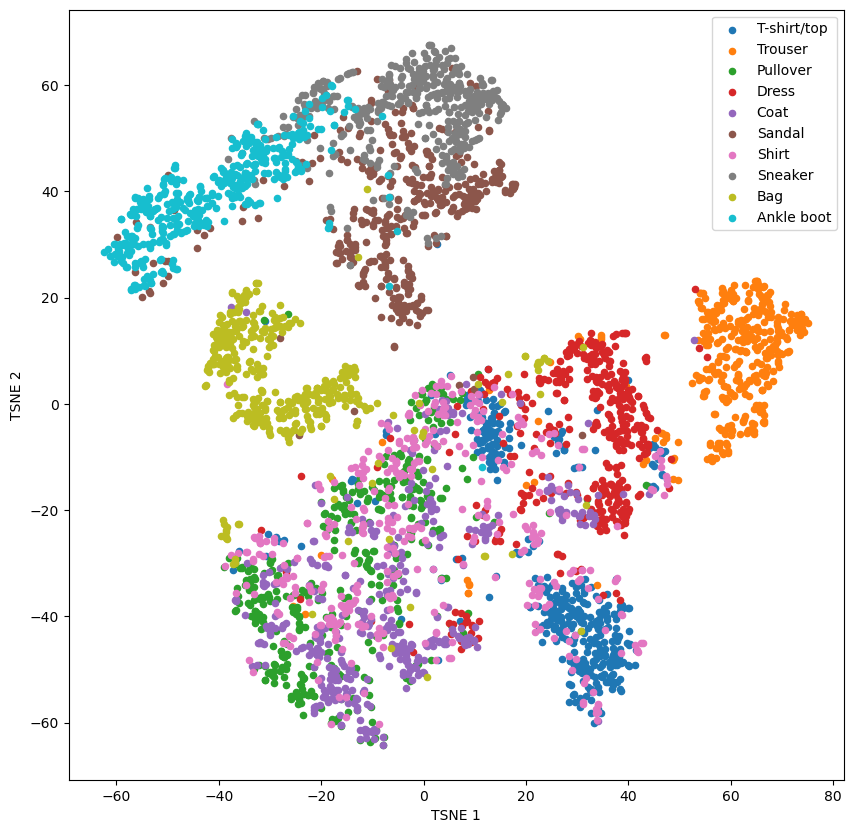

In [8]:
plt.figure(figsize=(10, 10))

for i in range(10):
    mask = y_train == i
    plt.scatter(X_train_tsne[mask, 0], X_train_tsne[mask, 1], s=20, label=label2cat[i])

plt.legend()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()
